# Construct data set from h5 file

In [2]:
import h5py
import numpy as np

In [3]:
# For reading dataset 
normalized = False
set_up_type = 'WS' # Choose "WS" or "SS"
if normalized:
    file_name = '/ritter/share/data/ADNI/h5files/ADNI_affine_normalized_slice.h5'
else:
    file_name = '/ritter/share/data/ADNI/h5files/ADNI_affine_slice.h5'
h5 = h5py.File(file_name,'r')

mri_slice = h5.get('mprage')[:]#.value 
sex = h5.get('sex')[:]#.value 
age = h5.get('age')[:]#.value 
subj_id = h5.get('subject')[:]#.value 
#mmse = h5.get('mmse')[:]#.value 
AD_group = h5.get('group')[:]
visit = h5.get('visit')[:]
series_id = h5.get('seriesid')[:]

h5.close()

In [202]:
# Plot MRI slices to detect degenerate pictures
#for (img, ser_id) in zip(mri_slice, series_id):
    #plt.imshow(img, cmap='gray')
#    plt.imsave(f"/home/johannes/Programming/ADNI/2D_slices/{ser_id}.png", img, cmap='gray')    

In [4]:
# Remove degenerate images from dataset
idx_imgs = np.where((series_id == 28071) | (series_id == 29861) | (series_id == 33353) | (series_id == 50197) | (series_id == 686265) | (series_id == 742187) | (series_id == 150197))
age = np.delete(age, idx_imgs, 0)
sex = np.delete(sex, idx_imgs, 0)
mri_slice = np.delete(mri_slice, idx_imgs, 0)
AD_group = np.delete(AD_group, idx_imgs, 0)
subj_id = np.delete(subj_id, idx_imgs, 0)
visit = np.delete(visit, idx_imgs, 0)

In [5]:
# Contrain visit to "screen" + reduce dataset
idx_screen = np.where(visit == b'screen')
visit_screen = visit[idx_screen]
mri_slice = mri_slice[idx_screen]
sex = sex[idx_screen]
age = age[idx_screen]
subj_id = subj_id[idx_screen]
AD_group = AD_group[idx_screen]

In [6]:
# age=0 entry found, remove from dataset 
idx_age0 = np.where(age == 0)
age = np.delete(age, idx_age0, 0)
sex = np.delete(sex, idx_age0, 0)
mri_slice = np.delete(mri_slice, idx_age0, 0)
AD_group = np.delete(AD_group, idx_age0, 0)
subj_id = np.delete(subj_id, idx_age0, 0)

In [7]:
# remove group=b'Patient' from dataset
idx_pat = np.where((AD_group == b'Patient')) # | (AD_group == b'SMC'))
age = np.delete(age, idx_pat, 0)
sex = np.delete(sex, idx_pat, 0)
mri_slice = np.delete(mri_slice, idx_pat, 0)
AD_group = np.delete(AD_group, idx_pat, 0)
subj_id = np.delete(subj_id, idx_pat, 0)

In [8]:
# Remove sex=X from dataset 
idx_sexX = np.where(sex == b'X')
age = np.delete(age, idx_sexX, 0)
sex = np.delete(sex, idx_sexX, 0)
mri_slice = np.delete(mri_slice, idx_sexX, 0)
AD_group = np.delete(AD_group, idx_sexX, 0)
subj_id = np.delete(subj_id, idx_sexX, 0)

In [9]:
# Transform sex into binary variable
sex_b = np.fromiter(sex, (np.compat.unicode,1))
print(np.unique(sex, return_counts=True))
sex_b = sex_b.view(np.int32)
sex_b[sex_b == 70] = 0
sex_b[sex_b == 77] = 1
sex = sex_b.astype(np.int64)

(array([b'F', b'M'], dtype='|S1'), array([622, 596]))


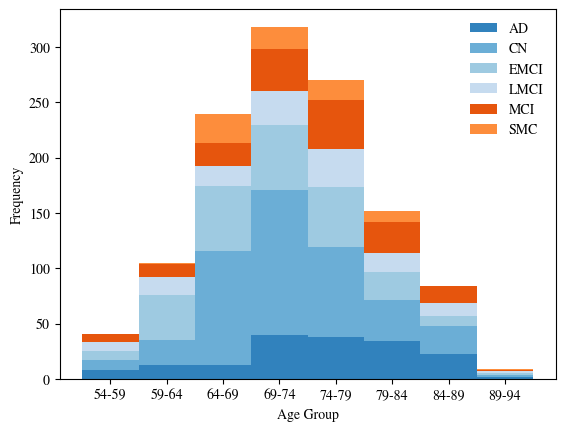

In [10]:
import matplotlib
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'age': age, 'condition': AD_group})
age_group_boundaries = np.arange(54, 96, 5)

# get colormaps
cmap = matplotlib.cm.get_cmap('tab20c')
colors = []
for i in range(7):
    colors.append(cmap(i))
    
# pivot and plot
fig = df.pivot(columns="condition", values="age").plot.hist(bins=age_group_boundaries, color=colors, stacked=True)
df.pivot(columns="condition", values="age").head()

# Set the x-ticks to the age group boundaries
fig.set_xticks(age_group_boundaries)

# Set the x-tick labels to the age group boundaries

#ax.set_xticklabels([f'{x}-{x+4}' for x in age_group_boundaries[:]])

labels = [f'{x}-{x+5}' for x in age_group_boundaries[:-1]]
locs = np.arange(56.5, 96.5, 5)
fig.xaxis.set_ticks(locs + 0.5)
fig.xaxis.set(ticks=locs, ticklabels=labels)

#mylabels = ['CN', 'EMCI', 'MCI', 'LMCI', 'SMC', 'AD'] # with SMC
mylabels = ['AD', 'CN', 'EMCI','LMCI', 'MCI', 'SMC'] # without SMC
leg = plt.legend(labels=mylabels)
leg.get_frame().set_linewidth(0.0)

# Label the axes and add a title
fig.set_xlabel('Age Group')
fig.set_ylabel('Frequency')
plt.savefig(f'age_distr_condition.png', dpi=600)

In [11]:
# Transform age into categorical variable
np.unique(age)
#np.histogram(age)
#plt.hist(age)
age[(age >= 54) & (age < 59)] = 0
age[(age >= 59) & (age < 64)] = 1
age[(age >= 64) & (age < 69)] = 2
age[(age >= 69) & (age < 74)] = 3
age[(age >= 74) & (age < 79)] = 4
age[(age >= 79) & (age < 84)] = 5
age[(age >= 84) & (age < 89)] = 6
age[(age >= 89) & (age < 94)] = 7
np.unique(age, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([ 41, 105, 239, 318, 270, 152,  84,   9]))

In [12]:
# Transform AD group to categorical 
AD_group_b = np.fromiter(AD_group, (np.compat.unicode,1))
AD_group_b = AD_group_b.view(np.int32)
print(np.unique(AD_group))
for i in np.unique(AD_group):
    idx_first = np.nonzero(AD_group==i)[0][0]
    print(AD_group_b[idx_first], AD_group[idx_first])

AD_group_b[AD_group_b == 67] = 0 # CN - 0
AD_group_b[AD_group_b == 69] = 1 # EMCI - 1
AD_group_b[AD_group_b == 77] = 2 # MCI - 2
AD_group_b[AD_group_b == 76] = 3 # LMCI - 3
#AD_group_b[AD_group_b == 83] = 4 # SMC - 4
AD_group_b[AD_group_b == 65] = 4 # AD - 5

AD_group = AD_group_b.astype(np.int64)

# delete SMC 
idx_SMC = np.where((AD_group == 83)) 
age = np.delete(age, idx_SMC, 0)
sex = np.delete(sex, idx_SMC, 0)
mri_slice = np.delete(mri_slice, idx_SMC, 0)
AD_group = np.delete(AD_group, idx_SMC, 0)
subj_id = np.delete(subj_id, idx_SMC, 0)


np.unique(AD_group, return_counts=True)

[b'AD' b'CN' b'EMCI' b'LMCI' b'MCI' b'SMC']
65 b'AD'
67 b'CN'
69 b'EMCI'
76 b'LMCI'
77 b'MCI'
83 b'SMC'


(array([0, 1, 2, 3, 4]), array([410, 255, 167, 139, 171]))

In [15]:
# Define groups to keep for classification 
type_class = "EMCI_LMCI"

if type_class == "CN_AD":
    idx_group = np.where((AD_group == 1) | (AD_group == 2) | (AD_group == 3)) 
    age = np.delete(age, idx_group, 0)
    sex = np.delete(sex, idx_group, 0)
    mri_slice = np.delete(mri_slice, idx_group, 0)
    AD_group = np.delete(AD_group, idx_group, 0)
    subj_id = np.delete(subj_id, idx_group, 0)
    AD_group[AD_group == 4] = 1
    file_name = 'ADNI_2D_affine_slice_screen_CNvsAD'
elif type_class == "CN_MCI_AD":
    AD_group[AD_group == 2] = 1
    AD_group[AD_group == 3] = 1
    AD_group[AD_group == 4] = 2
    file_name = 'ADNI_2D_affine_slice_screen_CNvsMCIvsAD'
else:
    idx_group = np.where((AD_group == 2)) 
    age = np.delete(age, idx_group, 0)
    sex = np.delete(sex, idx_group, 0)
    mri_slice = np.delete(mri_slice, idx_group, 0)
    AD_group = np.delete(AD_group, idx_group, 0)
    subj_id = np.delete(subj_id, idx_group, 0)
    AD_group[AD_group == 3] = 2
    AD_group[AD_group == 4] = 3
    file_name = 'ADNI_2D_affine_slice_screen_EMCI_LMCI_groups'
    pass

print(np.unique(AD_group, return_counts=True))

(array([0, 1, 2]), array([410, 255, 171]))


In [16]:
# For WS: Assign group membership according to age, sex 
import itertools
group_combinations = []
for r in itertools.product(range(8), range(len(np.unique(sex)))):
    group_combinations.append((r[0], r[1])) #r[0] = age, r[1] = sex

WS_group = np.empty(len(age))
for i, group in enumerate(group_combinations):
    idx =  np.where((age == group[0]) & (sex == group[1]))
    WS_group[idx] = i

WS_group = WS_group.astype(np.int64)
np.unique(WS_group, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array([ 17,   8,  44,  32, 109,  65, 136,  93,  74,  99,  44,  53,  18,
         39,   3,   2]))

In [17]:
# For WS: remove age-sex group 
if type_class == "CN_AD":
    idx_group = np.where((WS_group == 15)) 
    age = np.delete(age, idx_group, 0)
    sex = np.delete(sex, idx_group, 0)
    mri_slice = np.delete(mri_slice, idx_group, 0)
    AD_group = np.delete(AD_group, idx_group, 0)
    WS_group = np.delete(WS_group, idx_group, 0)
    subj_id = np.delete(subj_id, idx_group, 0)
elif type_class == "CN_MCI_AD":
    idx_group = np.where((WS_group == 15)) 
    age = np.delete(age, idx_group, 0)
    sex = np.delete(sex, idx_group, 0)
    mri_slice = np.delete(mri_slice, idx_group, 0)
    AD_group = np.delete(AD_group, idx_group, 0)
    WS_group = np.delete(WS_group, idx_group, 0)
    subj_id = np.delete(subj_id, idx_group, 0)
else:
    idx_group = np.where((WS_group == 15) | (WS_group == 14)) 
    age = np.delete(age, idx_group, 0)
    sex = np.delete(sex, idx_group, 0)
    mri_slice = np.delete(mri_slice, idx_group, 0)
    AD_group = np.delete(AD_group, idx_group, 0)
    WS_group = np.delete(WS_group, idx_group, 0)
    subj_id = np.delete(subj_id, idx_group, 0)
    pass

np.unique(WS_group, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 array([ 17,   8,  44,  32, 109,  65, 136,  93,  74,  99,  44,  53,  18,
         39]))

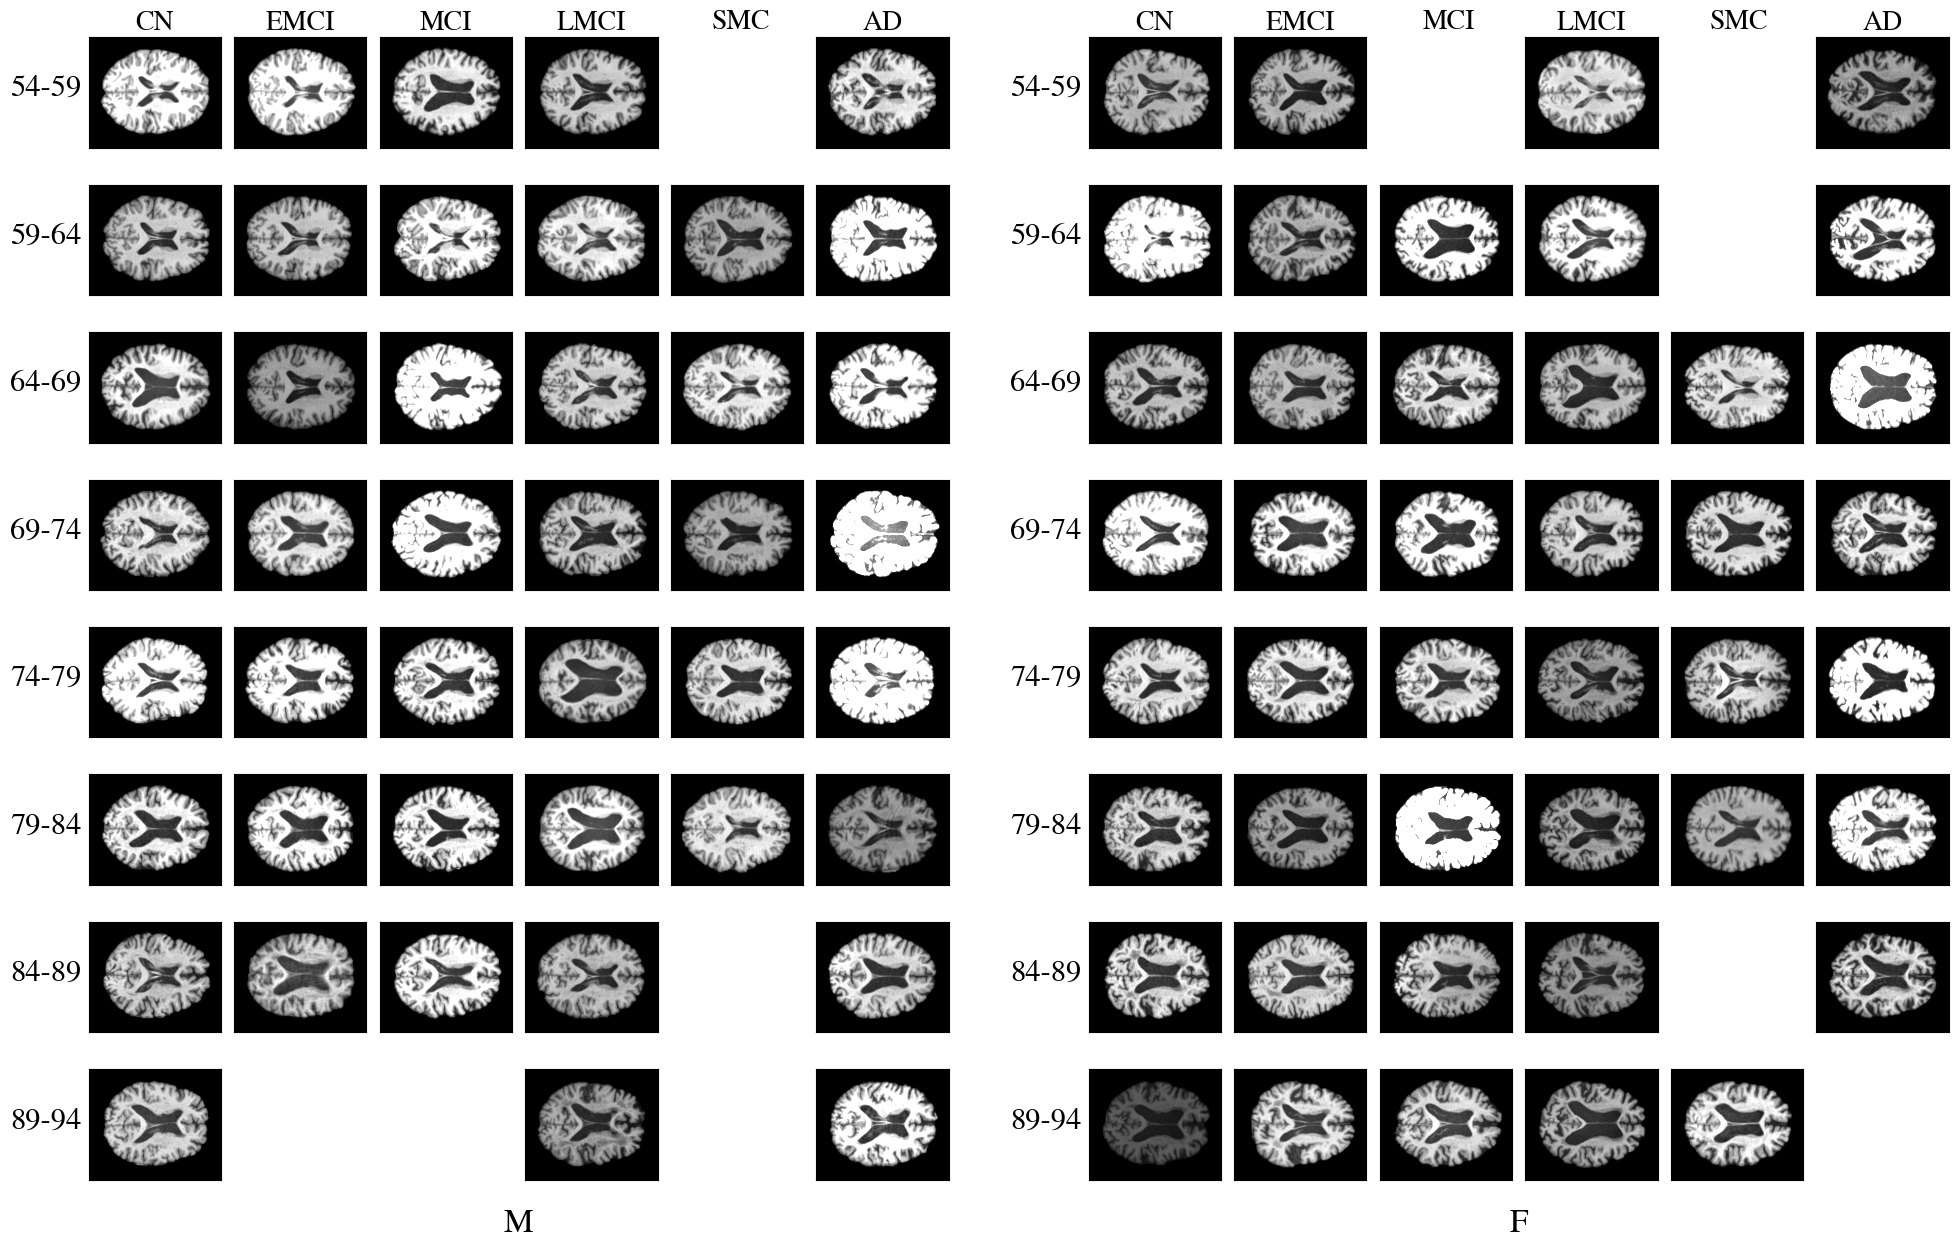

In [40]:
# Plot all MRI slices belonging to same group
import matplotlib
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import time 

AD_labels_map = {
    0: "CN",
    1: "EMCI",
    2: "MCI",
    3: "LMCI",
    4: "SMC",
    5: "AD"}
sex_labels_map = {
    0: "M",
    1: "F"}
age_labels_map = {
    0: "54-59",
    1: "59-64",
    2: "64-69",
    3: "69-74",
    4: "74-79",
    5: "79-84",
    6: "84-89",
    7: "89-94"}

import pandas as pd
df = {'AD_group': AD_group, 'age': age, 'sex': sex}
mri_data = pd.DataFrame(data=df)

fig = plt.figure(figsize=(20, 15))
gs1 = gridspec.GridSpec(8, 6)
gs1.update(left=0.05, right=0.48, wspace=0.1)

for ad_group in range(6):
    for a in range(8):
        idxs = mri_data.index[(mri_data['sex'] == 0) & (mri_data['AD_group'] == ad_group) & (mri_data['age'] == a)].tolist()
        if not idxs:
            black = np.zeros((182,218))
            black[0,0] = 1
            #ax.imshow(black, cmap='gray', vmin=0, vmax=1000)
        else:
            idx = idxs[0]
            ax = plt.subplot(gs1[a, ad_group])
            ax.imshow(mri_slice[idx, :, :], cmap='gray', vmin=0, vmax=400)
            if a == 0: ax.set_title(f'{AD_labels_map[ad_group]}', size=20)
            ax.tick_params(bottom= False, left=False, labelbottom=False, labelleft=False)
            if ad_group == 0: ax.text(-130, 95, f'{age_labels_map[a]}', size=22)

gs2 = gridspec.GridSpec(8, 6)
gs2.update(left=0.55, right=0.98, wspace=0.1)

for ad_group in range(6):
    for a in range(8):
        idxs = mri_data.index[(mri_data['sex'] == 1) & (mri_data['AD_group'] == ad_group) & (mri_data['age'] == a)].tolist()
        if not idxs:
            black = np.zeros((182,218))
            black[0,0] = 0.01
            #ax.imshow(black, cmap='gray', vmin=0, vmax=1000)
        else:
            idx = idxs[0]
            ax = plt.subplot(gs2[a, ad_group])
            ax.imshow(mri_slice[idx, :, :], cmap='gray', vmin=0, vmax=400)
            if a == 0: ax.set_title(f'{AD_labels_map[ad_group]}', size=20)
            ax.tick_params(bottom= False, left=False, labelbottom=False, labelleft=False)
            if ad_group == 0: ax.text(-130, 95, f'{age_labels_map[a]}', size=22)

fig.text(0.265, 0.08, 'M', ha='center', size=24)
fig.text(0.765, 0.08, 'F', ha='center', size=24)
fig.text(0.376, 0.8819, 'SMC', ha='center', size=20)
fig.text(0.73, 0.8819, 'MCI', ha='center', size=20)
fig.text(0.875, 0.8819, 'SMC', ha='center', size=20)

plt.savefig(f"/home/johannes/Programming/ADNI/group_visualization.png", dpi=500)

In [39]:
# Control 
np.max(mri_slice)

1602.7945556640625

In [172]:
import os
if normalized: 
    path = '/home/johannes/Programming/ADNI/' + file_name + '_normalized_' + set_up_type + '.h5'
else: 
    path = '/home/johannes/Programming/ADNI/' + file_name + '_' + set_up_type + '.h5'
print(path)

/home/johannes/Programming/ADNI/ADNI_2D_affine_slice_screen_EMCI_LMCI_groups_WS.h5


In [173]:
h5 = h5py.File(path, 'w')

h5.create_dataset('mri_slices', data=mri_slice)
h5.create_dataset('subj_id', data=subj_id)
h5.create_dataset('age', data=age)
h5.create_dataset('sex', data=sex)
h5.create_dataset('ad_group', data=AD_group)
h5.create_dataset('WS_group', data=WS_group)

h5.close()

In [85]:
df = pd.DataFrame({"subj_id" : subj_id, "age" : age, "sex": sex, "ad_group": AD_group})
df.to_csv("ADNI_2D_affine_slice_screen_all_groups.csv", index=False)